<a href="https://colab.research.google.com/github/Aicoaching2025/Medical-Insurance-Costs/blob/main/Copy_of_US_Insurance_Costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import csv library
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**insurance.csv** contains the following columns:
* Patient Age
* Patient Sex
* Patient BMI
* Patient Number of Children
* Patient Smoking Status
* Patient U.S Geopraphical Region
* Patient Yearly Medical Insurance Cost

There are no signs of missing data. To store this information, seven empty lists will be created hold each individual column of data from **insurance.csv**.


In [ ]:
file_path = '/content/drive/MyDrive/python-portfolio-example-solution/insurance.csv'

In [ ]:
data = pd.read_csv(file_path)

# U.S. Medical Insurance Costs

In this project, a **CSV** file with medical insurance costs will be investigated using Python fundamentals. The goal with this project will be to analyze various attributes within **insurance.csv** to learn more about the patient information in the file and gain insight into potential use cases for the dataset.

In [ ]:
#Create empty lists for the various attributes in insurance.csv
ages = []
sexes = []
bmis = []
num_children = []
smoker_statuses = []
regions = []
insurance_charges = []

In [ ]:
# helper function to load csv data
def load_list_data(lst, csv_file, column_name):
    # open csv file
    with open(csv_file) as csv_info:
        # read the data from the csv file
        csv_dict = csv.DictReader(csv_info)
        # loop through the data in each row of the csv
        for row in csv_dict:
            # add the data from each row to a list
            lst.append(row[column_name])
        # return the list
        return lst

The helper function above was created to make loading data into the lists as efficient as possible. Without this function, one would have to open **insurance.csv** and rewrite the `for` loop seven times; however, with this function, one can simply call `load_list_data()` each time as shown below.

In [ ]:
# Instead of using load_list_data, extract data from the existing 'data' DataFrame.
ages = data['age'].tolist()
sexes = data['sex'].tolist()
bmis = data['bmi'].tolist()
num_children = data['children'].tolist()
smoker_statuses = data['smoker'].tolist()
regions = data['region'].tolist()
insurance_charges = data['charges'].tolist()

Now that all the data from **insurance.csv** neatly organized into labeled lists, the analysis can be started. This is where one must plan out what to investigate and how to perform the analysis. There are many aspects of the data that could be looked into. The following operations will be implemented:
* find average age of the patients
* return the number of males vs. females counted in the dataset
* find geographical location of the patients
* return the average yearly medical charges of the patients
* creating a dictionary that contains all patient information

To perform these inspections, a class called `PatientsInfo` has been built out which contains fives methods:
* `analyze_ages()`
* `analyze_sexes()`
* `unique_regions()`
* `average_charges()`
* `create_dictionary()`

The class has been built out below.

In [ ]:
class PatientsInfo:
    # init method that takes in each list parameter
    def __init__(self, patients_ages, patients_sexes, patients_bmis, patients_num_children,
                 patients_smoker_statuses, patients_regions, patients_charges):
        self.patients_ages = patients_ages
        self.patients_sexes = patients_sexes
        self.patients_bmis = patients_bmis
        self.patients_num_children = patients_num_children
        self.patients_smoker_statuses = patients_smoker_statuses
        self.patients_regions = patients_regions
        self.patients_charges = patients_charges

    # method that calculates the average ages of the patients in insurance.csv
    def analyze_ages(self):
        # initialize total age at zero
        total_age = 0
        # iterate through all ages in the ages list
        for age in self.patients_ages:
            # sum of the total age
            total_age += int(age)
        # return total age divided by the length of the patient list
        return ("Average Patient Age: " + str(round(total_age/len(self.patients_ages), 2)) + " years")

    # method that calculates the number of males and females in insurance.csv
    def analyze_sexes(self):
        # initialize number of males and females to zero
        females = 0
        males = 0
        # iterate through each sex in the sexes list
        for sex in self.patients_sexes:
            # if female add to female variable
            if sex == 'female':
                females += 1
            # if male add to male variable
            elif sex == 'male':
                males += 1
        # print out the number of each
        print("Count for female: ", females)
        print("Count for male: ", males)

    # method to find each unique region patients are from
    def unique_regions(self):
        # initialize empty list
        unique_regions = []
        # iterate through each region in regions list
        for region in self.patients_regions:
            # if the region is not already in the unique regions list
            # then add it to the unique regions list
            if region not in unique_regions:
                unique_regions.append(region)
        # return unique regions list
        return unique_regions

    # method to find average yearly medical charges for patients in insurance.csv
    def average_charges(self):
        # initialize total_charges variable
        total_charges = 0
        # iterate through charges in patients charges list
        # add each charge to total_charge
        for charge in self.patients_charges:
            total_charges += float(charge)
        # return the average charges rounded to the hundredths place
        return ("Average Yearly Medical Insurance Charges: " +
                str(round(total_charges/len(self.patients_charges), 2)) + " dollars.")

    # method to create dictionary with all patients information
    def create_dictionary(self):
        self.patients_dictionary = {}
        self.patients_dictionary["age"] = [int(age) for age in self.patients_ages]
        self.patients_dictionary["sex"] = self.patients_sexes
        self.patients_dictionary["bmi"] = self.patients_bmis
        self.patients_dictionary["children"] = self.patients_num_children
        self.patients_dictionary["smoker"] = self.patients_smoker_statuses
        self.patients_dictionary["regions"] = self.patients_regions
        self.patients_dictionary["charges"] = self.patients_charges
        return self.patients_dictionary

The next step is to create an instance of the class called `patient_info`. With this instance, each method can be used to see the results of the analysis.

In [ ]:
patient_info = PatientsInfo(ages, sexes, bmis, num_children, smoker_statuses, regions, insurance_charges)

In [ ]:
patient_info.analyze_ages()

'Average Patient Age: 39.21 years'

The average age of the patients in **insurance.csv** is about 39 years old. This is important to check in order to ensure the data in **insurance.csv** is representative for a broader population. If it is decided to use the dataset to make inferences about other populations, the data must abundant and broad enough for such use cases.

A further analysis would have to be done to make sure the [range](https://www.mathsisfun.com/data/range.html#:~:text=The%20Range%20is%20the%20difference,is%209%20%E2%88%92%203%20%3D%206.) and [standard deviation](https://www.mathsisfun.com/data/standard-deviation.html) of the patient age group in **insurance.csv** is indicative of a random sampling of individuals.

In [ ]:
patient_info.analyze_sexes()

Count for female:  662
Count for male:  676


The next step of the analysis is to check the balance of males vs. females in **insurance.csv**. Similar to above, it is important to check that this dataset is representative of a broader population of individuals. If a person were to use this dataset to create a classification model, it would be imperitive to make sure that the attributes are balanced.

Quite often in the real-world, data is not balanced; this is an issue because it can lead to statistical issues when performing analysis. This is something that will be explored further in future portfolio projects!

In [ ]:
patient_info.unique_regions()

['southwest', 'southeast', 'northwest', 'northeast']

There are four unique geographical regions in this dataset, and it is important to note that all the patients come from the United States.

In [ ]:
patient_info.average_charges()

'Average Yearly Medical Insurance Charges: 13270.42 dollars.'

The average yearly medical insurance charge per individual is 13270 US dollars. Some further analysis could be done to see what patient attributes contribute most strongly to low and/or high medical insurance charges. For example, one could check if patient age correlates with the amount of money they spend yearly.

In [ ]:
#patient_info.create_dictionary()

{'age': [19,
  18,
  28,
  33,
  32,
  31,
  46,
  37,
  37,
  60,
  25,
  62,
  23,
  56,
  27,
  19,
  52,
  23,
  56,
  30,
  60,
  30,
  18,
  34,
  37,
  59,
  63,
  55,
  23,
  31,
  22,
  18,
  19,
  63,
  28,
  19,
  62,
  26,
  35,
  60,
  24,
  31,
  41,
  37,
  38,
  55,
  18,
  28,
  60,
  36,
  18,
  21,
  48,
  36,
  40,
  58,
  58,
  18,
  53,
  34,
  43,
  25,
  64,
  28,
  20,
  19,
  61,
  40,
  40,
  28,
  27,
  31,
  53,
  58,
  44,
  57,
  29,
  21,
  22,
  41,
  31,
  45,
  22,
  48,
  37,
  45,
  57,
  56,
  46,
  55,
  21,
  53,
  59,
  35,
  64,
  28,
  54,
  55,
  56,
  38,
  41,
  30,
  18,
  61,
  34,
  20,
  19,
  26,
  29,
  63,
  54,
  55,
  37,
  21,
  52,
  60,
  58,
  29,
  49,
  37,
  44,
  18,
  20,
  44,
  47,
  26,
  19,
  52,
  32,
  38,
  59,
  61,
  53,
  19,
  20,
  22,
  19,
  22,
  54,
  22,
  34,
  26,
  34,
  29,
  30,
  29,
  46,
  51,
  53,
  19,
  35,
  48,
  32,
  42,
  40,
  44,
  48,
  18,
  30,
  50,
  42,
  18,
  54,
  32,
  37,
  4

All patient data is now neatly organized in a dictionary. This is convenient for further analysis if a decision is made to continue making investigations for the attributes in **insurance.csv**.

In [ ]:
# Display dataset information
print("Dataset Overview:")
print(data.info())  # Shows column types and missing values
print("\nFirst 5 Rows of the Dataset:")
print(data.head())  # Displays the first few rows

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

First 5 Rows of the Dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
# Set seaborn style for better visualization
sns.set_style("whitegrid")

In [ ]:
# 1. Distribution of Insurance Charges
sns.histplot(data["charges"], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Insurance Charges")

Text(0.5, 1.0, 'Distribution of Insurance Charges')

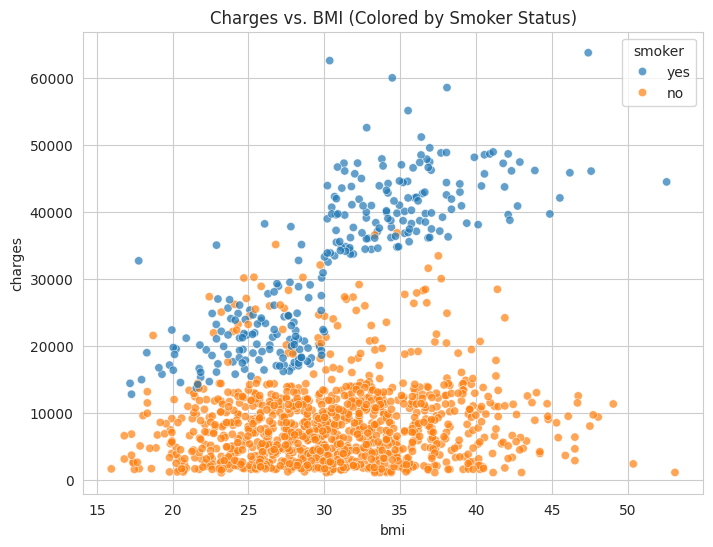

In [ ]:
# 2. Charges vs. BMI (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["bmi"], y=data["charges"], hue=data["smoker"], alpha=0.7)
plt.title("Charges vs. BMI (Colored by Smoker Status)")
plt.show()


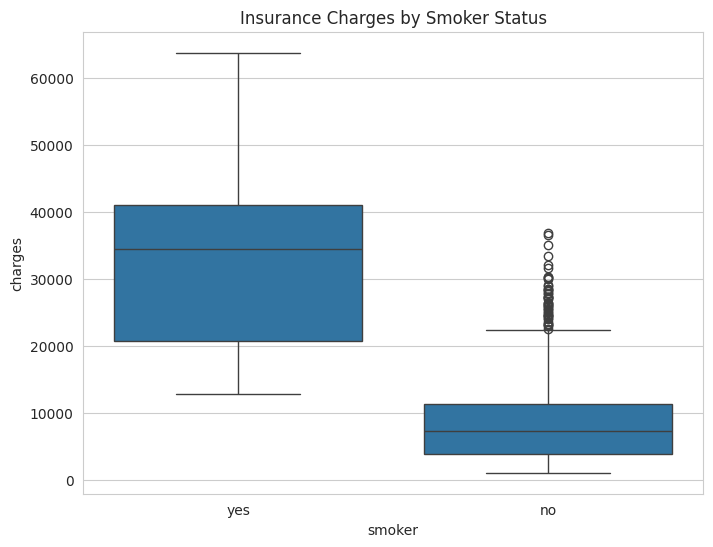

In [ ]:
# 3. Charges by Smoker Status (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["smoker"], y=data["charges"])
plt.title("Insurance Charges by Smoker Status")
plt.show()

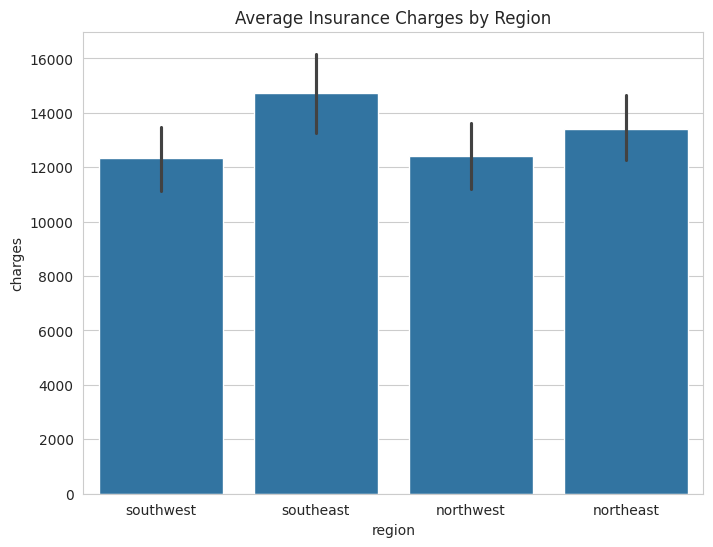

In [ ]:
# 4. Charges by Region (Bar Plot)
plt.figure(figsize=(8, 6))
sns.barplot(x=data["region"], y=data["charges"], estimator=lambda x: x.mean())
plt.title("Average Insurance Charges by Region")
plt.show()


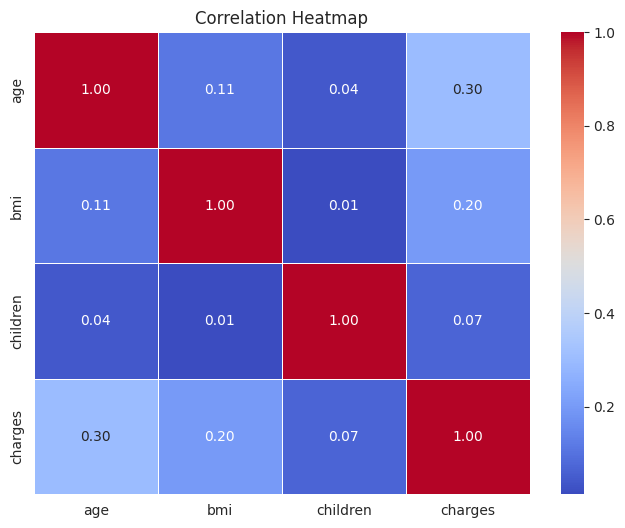

In [ ]:
# 5. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()